In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df_orig = df.copy()


In [4]:
df.loc[0:5, 'bmi'] = np.nan
df.loc[10:12, 'bp'] = np.nan
print("🔹 Missing values before filling:\n", df.isnull().sum())

🔹 Missing values before filling:
 age       0
sex       0
bmi       6
bp        3
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
print("🔹 After imputation:\n", df.isnull().sum())


🔹 After imputation:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_minmax = df.copy()
df_standard = df.copy()

df_minmax[diabetes.feature_names] = scaler_minmax.fit_transform(df[diabetes.feature_names])
df_standard[diabetes.feature_names] = scaler_standard.fit_transform(df[diabetes.feature_names])

In [8]:
df['bmi_bin'] = pd.cut(df['bmi'], bins=3, labels=["Low", "Medium", "High"])


In [9]:
df['age_bmi'] = df['age'] * df['bmi']
df['bp_hdl'] = df['bp'] * df['s5']

In [10]:
X = df[diabetes.feature_names]
y = df['target']
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("🔹 Top 5 features selected:", selected_features.tolist())

🔹 Top 5 features selected: ['bmi', 'bp', 's3', 's4', 's5']


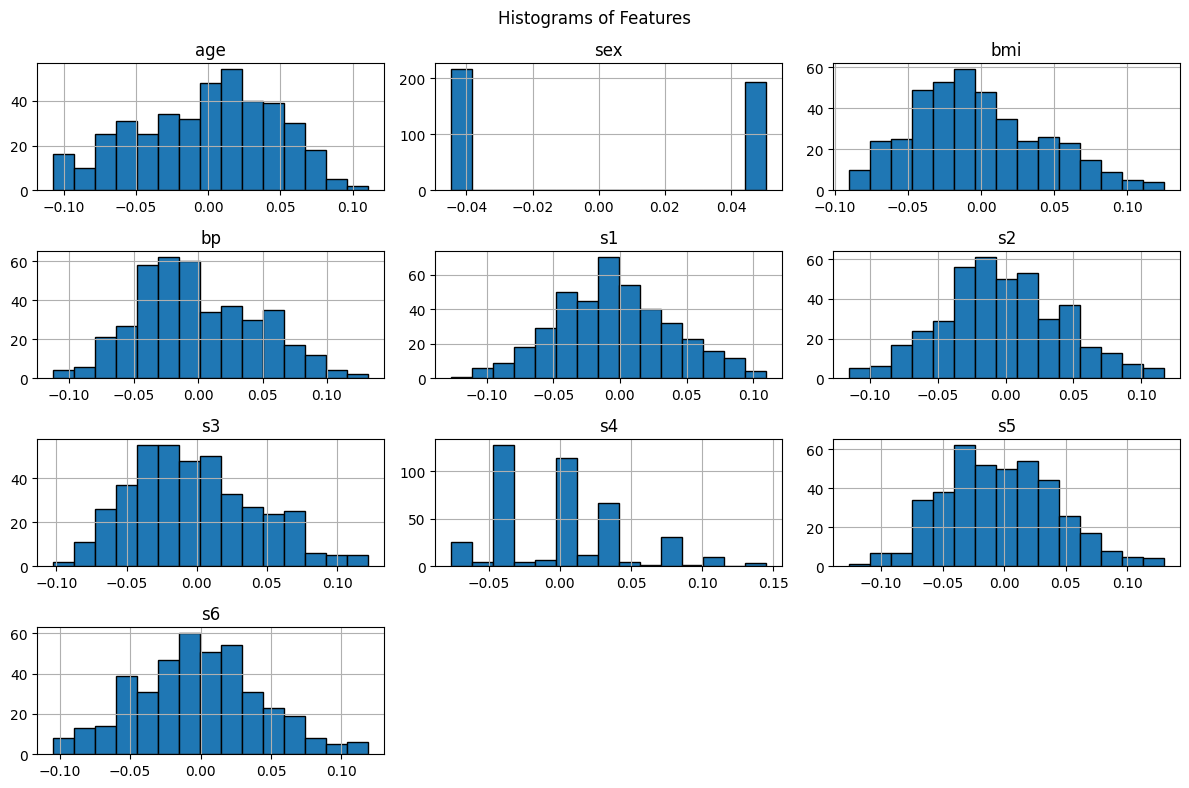

In [11]:
df[diabetes.feature_names].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()


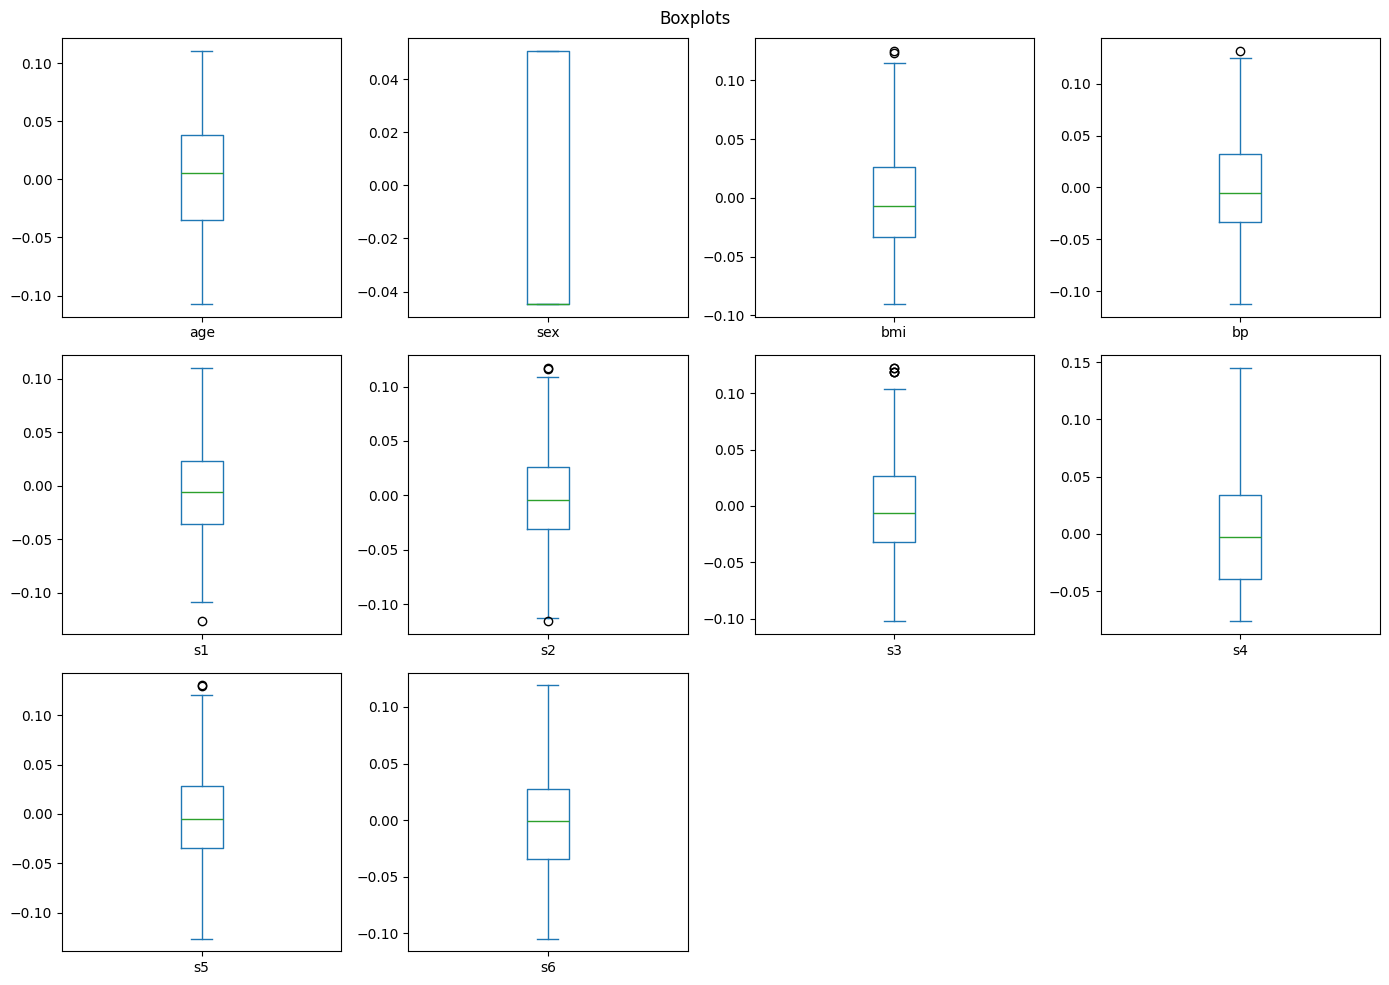

In [12]:
df[diabetes.feature_names].plot(kind='box', subplots=True, layout=(3, 4), figsize=(14, 10), title="Boxplots")
plt.tight_layout()
plt.show()

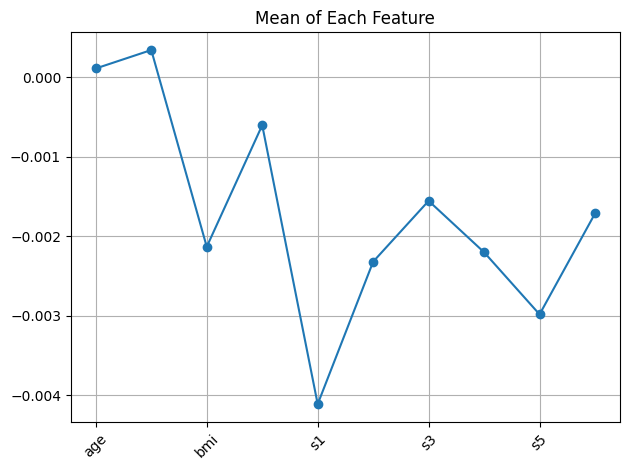

In [13]:
means = df[diabetes.feature_names].mean()
means.plot(kind='line', marker='o')
plt.title("Mean of Each Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

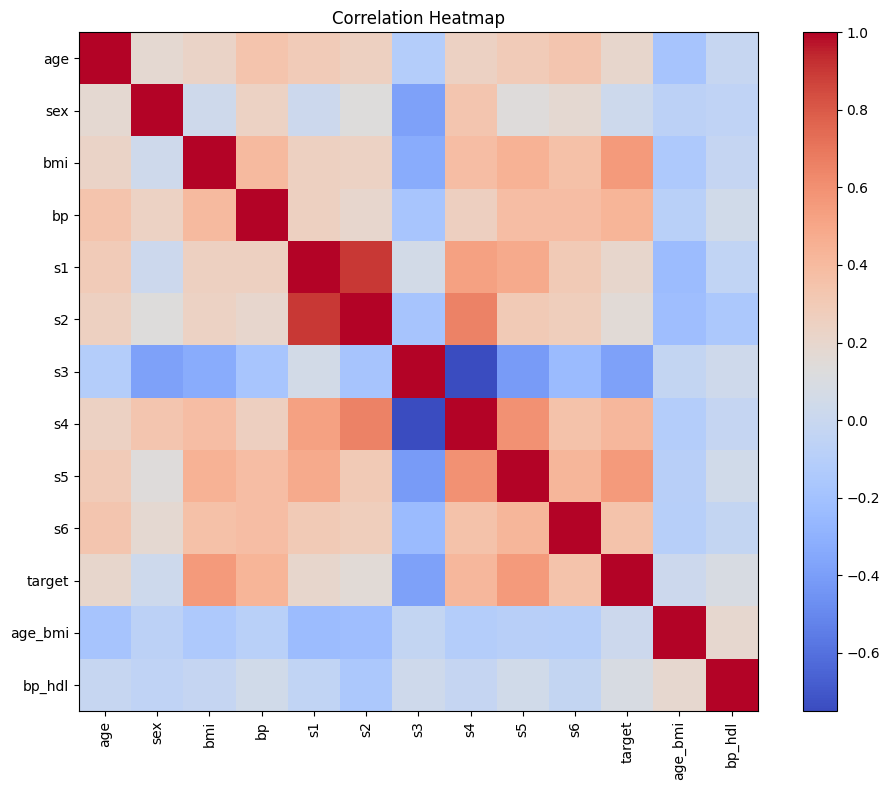

In [14]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

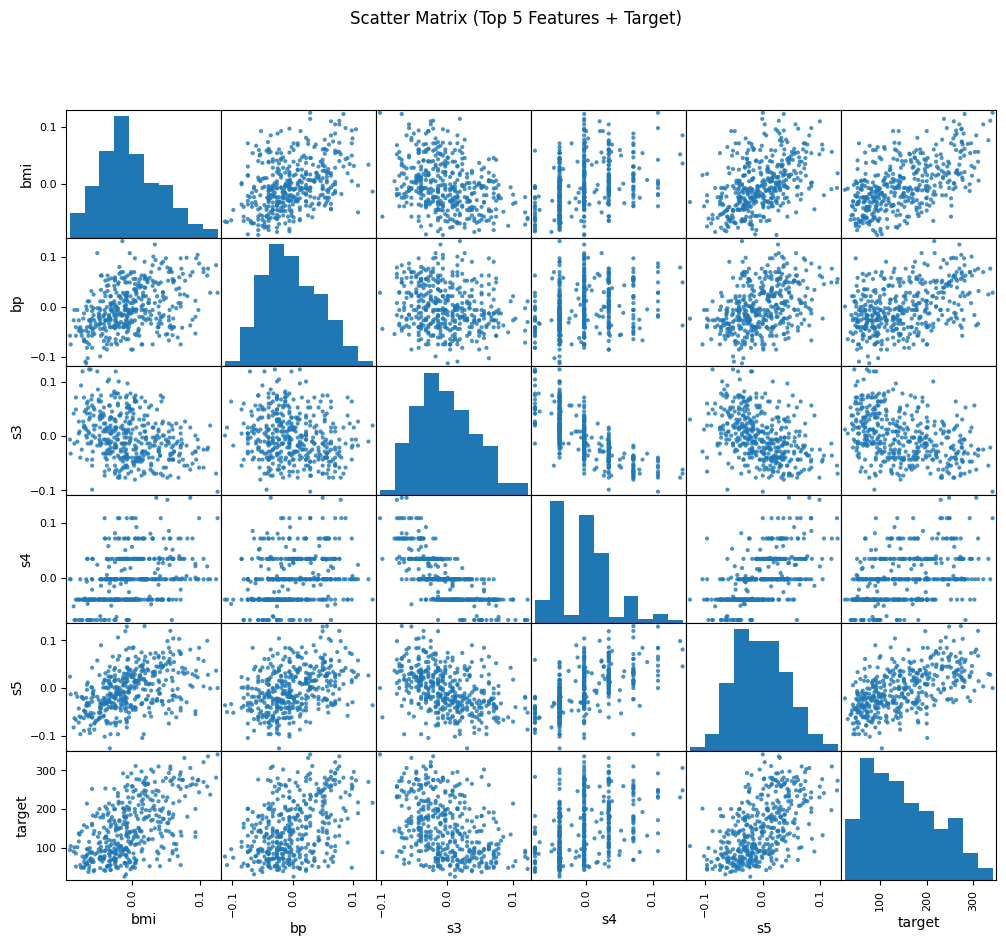

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[selected_features.tolist() + ['target']], figsize=(12, 10), alpha=0.8, diagonal='hist')
plt.suptitle("Scatter Matrix (Top 5 Features + Target)")
plt.show()

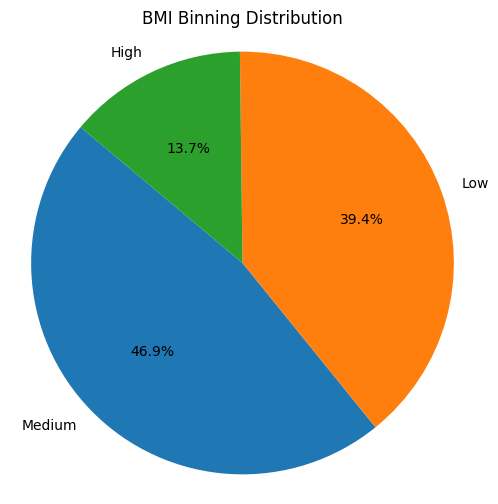

In [16]:
plt.figure(figsize=(6, 6))
df['bmi_bin'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("BMI Binning Distribution")
plt.ylabel("")
plt.axis('equal')
plt.show()